# Car Prediction Assigment notebook


In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#

In [591]:
car_data = pd.read_csv('../data/data.csv')


In [592]:
car_data.shape

(6864, 16)

In [593]:
car_data.head(5)

,car_name,year,price,color,fuil_type,car_prev_state,license_country,transimission_type,glass_type,motor_power,mileage,passenger_capacity,prev_owners,additional_info,insurance_cost,sell_date
0,كيا اوبتيما,2014.0,100000.0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000.0,4+1,يد اولى,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف...",3090.0,2017-08-16
1,كيا سورينتو,2007.0,60000.0,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000.0,7+1,2,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف...",2740.0,2017-08-16
2,هونداي افانتي,2006.0,43500.0,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,NaN,"مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,جنطات مغ...",2340.0,2017-08-19
3,فيات 127,1982.0,5500.0,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,NaN,4+1,00,"مُكيّف,مسجل CD",967.0,2017-08-17
4,بيجو 208,2014.0,54000.0,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000.0,4+1,NaN,"مُكيّف,إغلاق مركزي,جهاز إنذار,جنطات مغنيسيوم,و...",2035.0,2017-08-17


In [594]:
car_data['additional_info'].fillna('', inplace=True)

In [595]:
# handle the null values inside the sell_date column by replacing it with the previous value
car_data['sell_date'].fillna(method='ffill', inplace=True)

In [596]:
def normalize_prev_owner(prev_owner):
    if prev_owner is np.nan:
        return np.nan
    try :
        return str(int(prev_owner))
    except ValueError:
        pass
    if re.search(r'صفر|مش|وارد|مان|احد|يوجد|استيراد|مستورد|شرك|انا', prev_owner):
        return '0'
    if re.search(r'أول|اول|1', prev_owner):
        return 1
    if re.search(r'ثان|تان|2|اثنان', prev_owner):
        return 2
    if re.search(r'ثالث|تالث|3|ثلاث|تلات|تالت', prev_owner):
        return 3
    if re.search(r'رابع|4|اربع|اربعة|اربعه', prev_owner):
        return 4
    if re.search(r'خامس|5|خمس|خمسة|خمسه', prev_owner):
        return 5
    if re.search(r'سادس|6|سادسة|سادسه', prev_owner):
        return 6
    if re.search(r'سابع|7|سابعة|سابعه', prev_owner):
        return 7
    if re.search(r'ثامن|8|ثامنة|ثامنه', prev_owner):
        return 8
    if re.search(r'تاسع|9|تاسعة|تاسعه', prev_owner):
        return 9
    if re.search(r'عاشر|10|عشر|عشرة|عشره', prev_owner):
        return 10
    if re.search('يد', prev_owner):
        try :
            return str(int(re.search(r'\d+', prev_owner).group())) 
        except AttributeError:
            return np.nan
    if re.search(r'[^a-zA-Z0-9\u0600-\u06FF]', prev_owner):
        return np.nan
    return prev_owner
car_data['prev_owners'] = car_data['prev_owners'].apply(normalize_prev_owner)


In [597]:
#handle the null values inside the prev_owner column by replacing it with the the mean of all the rows with the same year value
print(len(car_data['prev_owners'].unique()))
car_data['prev_owners'].unique()

41


array([1, '2', nan, '0', '1', 2, '4', '3', 3, '8', 6, '5', '9', 4, '6',
       '7', '159000', '12', '10', 5, '11', 10, '56', '13', '16', '17', 9,
       '78888877766', '15', '170000', '18', '123423', 7, 8, '14', '12345',
       '1000', '778244', '19', '11111', '44444'], dtype=object)

<AxesSubplot: >

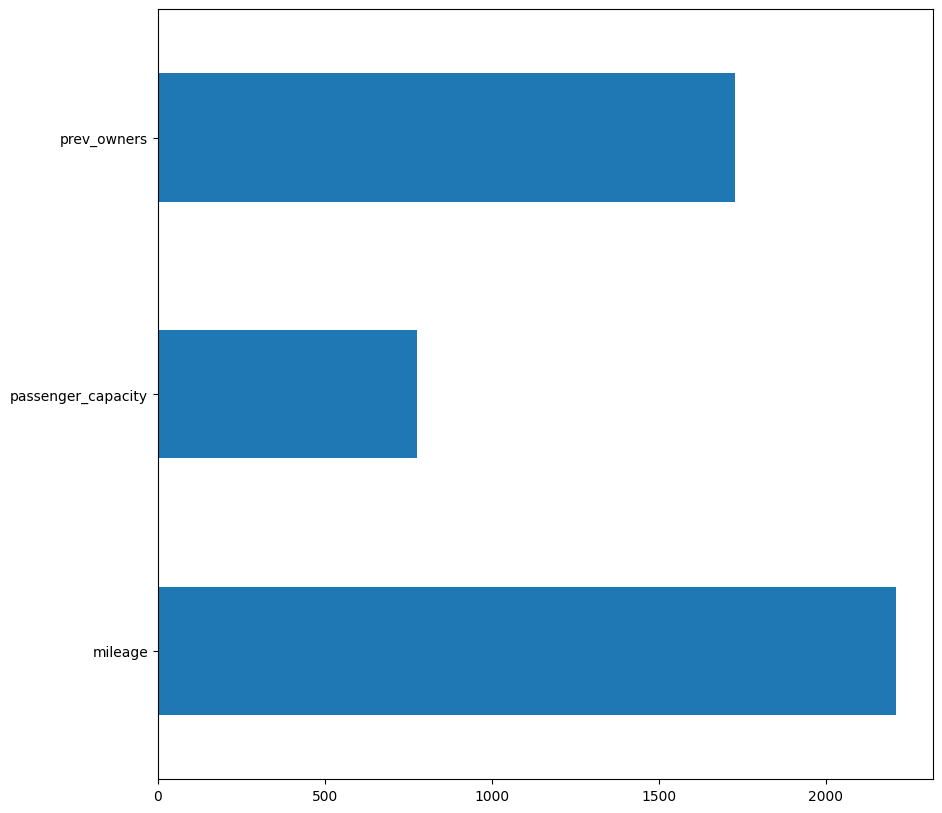

In [598]:
# ## Data Preprocessing
# get the null values
#make the bar plot virtical
sum_of_nulls = car_data.isnull().sum()
sum_of_nulls[sum_of_nulls >0].plot(kind='barh', figsize=(10, 10))